# E-commerce - Анализ товарного ассортимента

## Содержание

1) [Описание проекта](#anchor_1)  
2) [Загрузка данных и подготовка их к анализу](#anchor_2)  
3) [Исследовательский анализ данных (EDA)](#anchor_3)  
4) [Динамика и сезонность продаж](#anchor_4)  
5) [Кластеризация заказов](#anchor_5)  
6) [Общий вывод и рекомендации](#anchor_6)  

---

## Визуальные материалы по исследованию

[Презентация](https://drive.google.com/file/d/1PQ34dOp-Rd6yiGS1aDWc7V0t4h7VYvrN/view?usp=sharing) подготовленная в формате pdf.  
[Дашборд](https://public.tableau.com/app/profile/elena7133/viz/E-commerce_16563338157140/Dashboard1) выполненный в Tableau.Public.

<a id='anchor_1'></a>
## Описание проекта

Команда аналитиков в интернет-магазине товаров для дома и быта "Пока все ещё тут" работает над анализом поведения клиентов, ищет подходы для сегментирования товаров, исследует сезонность товаров. В результате разрабатываются предложения для отдела маркетинга по оптимизации ассортимента и увеличению прибыли.

**Цель исследования:**

Проанализировать ассортимент товаров и дать базовые рекомендации по оптимизации ассортимента и увеличению прибыли.

**Задачи исследования:**

Проанализировать ассортимент товаров.
- Провести исследовательский анализ данных, добавить категории товаров;
- Проанализировать торговый ассортимент, изучить динамику продаж и фактор сезонности;
- Сформулировать и проверить статистические гипотезы и влиянии сезона на среднюю сумму чека;
- Провести кластеризацию заказов.


**Ход исследования:**

*Шаг 1.* Загрузка и обзор данных
Загрузить данные. Привести название граф к "хорошему стилю". Изучить пропуски, по возможности заполнить их (если речь идет о показателях, которые имеют для нас значение). Проверить наличие дубликатов (явных и неявных).

*Шаг 2.* Провести исследовательский анализ данных (EDA)
Изучить средние значения и стандартные отклонения (метод describe()). Выяснить, содержатся ли в данных аномалии. Определить период исследования (найти максимальную и минимальную даты). Добавить расчетные столбцы с выручкой (по наименованию товара и в целом по заказу) и с количеством позиций товара в заказе. Выделить категории товаров. Разложить ассортимент товаров на две группы: основные и дополнительные (скорее всего по цене и количеству, основной имеет высокую цену и покупается в 1 экземпляре, дополнительный товар дешёвый и продается в больших количествах, его можно рекомендовать покупателю при приобретении основного). Определить наиболее популярные товары.

*Шаг 3.* Изучить динамику выручки, исследовать сезонность
Построить графики динамики выручки, выяснить, есть ли какие-то закономерности. Изучить размер выручки по категориям товаров, их динамику. Например, если закономерно выручка падает зимой и растет осенью, то полезно об этом знать, чтобы преждевременно не рассуждать о банкротстве. Определить среднюю сумму чека. Поверить гипотезу о влиянии сезона на среднюю сумму чека.   
Сравнить динамику продаж основных и дополнительных товаров, изучить фактор сезонности в каждой из групп.

*Шаг 4.* Провести кластеризацию заказов
Нарисовать дендрограмму, определить желательное число кластеров. Определить типичные составы заказов. Сравнить средние значения признаков для кластеров (например, размер среднего чека и количество позиций товара в заказе). Для каждого полученного кластера посчитать размер среднего чека и определить наиболее прибыльный сегмент (набор товаров в заказе). Построить распределения сумм заказов по каждому кластеру.

*Шаг 5.* Сформулировать выводы и дать базовые рекомендации по оптимизации ассортимента и увеличению прибыли.

---

<a id='anchor_2'></a>
## Загрузка данных и подготовка их к анализу

Для начала произведём импорт всех необходимых нам библиотек, сделаем некоторые базовые настройки:

In [1]:
# импорт библиотеки pandas
import pandas as pd

#импорт библиотеки numpy для операций с массивами
import numpy as np

# импорт библиотеки для работы с датами
from datetime import datetime, timedelta

# импорт библиотеки визуализации seaborn
import seaborn as sns

# импорт библиотеки matplotlib для продвинутой работы с графиками
import matplotlib.pyplot as plt

# зададим цветовую палитру для графиков
sns.set_palette('muted') 

# зафиксируем размер графиков
plt.rcParams["figure.figsize"] = (12,6)

# импорт библиотеки для проведения статистических тестов
from scipy import stats as st

# импорт библиотек для построения моделей
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

import itertools

# импорт библиотеки для игнорирования предупреждений
import warnings
warnings.filterwarnings("ignore")

# снимем ограничение по ширине граф
pd.set_option('display.max_colwidth', None)

# снимем ограничение по количеству отображаемых строк
pd.set_option('display.max_rows', None)

Прочитаем данные из файла с информацией о покупках пользователей в интернет-магазине. Выведем на экран 5 случайных строк:

In [2]:
try:
    ecom = pd.read_csv('/datasets/ecommerce_dataset.csv')
except:
    ecom = pd.read_csv('ecommerce_dataset.csv')
ecom.sample(5)

,date,customer_id,order_id,product,quantity,price
4363,2019060308,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
122,2018100712,43993fd2-20c9-44f7-8634-cf0aee26df4f,14482,Пеларгония зональная диам. 12 см сиреневый полумахровый,1,188.0
1496,2019011219,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,Пеларгония зональная РОЗОЦВЕТНАЯ Маргарита лососевая 5-7 листов,1,90.0
2776,2019041014,5cdbdfcf-e204-4836-be84-8485d4e4e100,14631,Пеларгония розебудная Mary укорененный черенок,1,135.0
1509,2019011409,ea4043a9-1864-430a-9b4c-d8286915bf10,69812,Подкладка под чехол Zalger 520140 135х50 см поролон,1,127.0


**Описание данных:**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».  
Согласно документации набор данных включает следующие поля:
- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.

Посмотрим общую информацию о таблице, воспользовавшись методом *info()*:

In [3]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Итак, в нашем распоряжении оказалась таблица из 6 граф и 4737 строк. Так как количество столбцов небольшое, то нет необходимости проверять наличие пропусков методом *isna()* - их нет.

Названия столбцов приведены в удобном виде. Для простоты работы с датами преобразуем тип данных в графе 'date':

In [4]:
ecom['date']=pd.to_datetime(ecom['date'], format='%Y%m%d%H')
print(ecom.dtypes)
ecom.sample(5)

date           datetime64[ns]
customer_id            object
order_id                int64
product                object
quantity                int64
price                 float64
dtype: object


,date,customer_id,order_id,product,quantity,price
944,2018-11-23 20:00:00,278cffb9-4414-449a-8cb8-ffdbef1bf1d8,69100,"Сменный блок для ролика 2 шт (R160071), Rozenbal, R510100",1,38.0
4287,2019-06-02 10:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0
1051,2018-12-02 13:00:00,57cfa38a-325b-4b03-8419-cd4420053bdd,69169,Муляж Красное яблоко мини полиуретан d-6 см,12,20.0
1646,2019-01-31 14:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70043,"Петля рояльная цинк 960 мм, 1103055",1,74.0
1841,2019-02-16 10:00:00,c850ba6d-b3b8-4052-bda4-b23c11fa5fba,70286,Сушилка для белья на ванну НИКА СБ4,1,449.0


Найдём минимальную и максимаьную дату заказа, тем самым определим период исследования:

In [5]:
print('Период текущего исследования:')
print('с ', ecom['date'].min(), ' по ', ecom['date'].max())

Период текущего исследования:
с  2018-10-01 00:00:00  по  2019-10-31 16:00:00


Период исследования чуть более года. Проверим наличие явных дубликатов:

In [6]:
ecom.duplicated().sum()

0

Таковых не оказалось. Проверим,нет ли в данных ситуации, когда один и тот же заказ выполнили разные пользователи. Исключим столбец 'customer_id' и поищем совпадения по оставшимся графам:

In [7]:
ecom[ecom.duplicated(['date', 'order_id', 'product', 'quantity', 'price'])]

,date,customer_id,order_id,product,quantity,price
4298,2019-06-02 10:00:00,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0


Такой дубликат вряд ли возможен. Имеет место ошибка в данных. Следует этот дубль удалить:

In [8]:
ecom = ecom.drop_duplicates(subset = ['date', 'order_id', 'product', 'quantity', 'price'])
ecom[ecom.duplicated(['date', 'order_id', 'product', 'quantity', 'price'])]

,date,customer_id,order_id,product,quantity,price


Далее исключим столбец с датой и проверим, найдутся ли совпадения по оставшимся столбцам:

In [9]:
ecom[ecom.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price'])].head(20)

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
126,2018-10-07 17:00:00,ce0e0c29-8c8b-4714-84bd-80957224d4cf,68557,Сумка-тележка хозяйственная Gimi Market синяя,1,1874.0
147,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 15,0 л пищевой овальный ""Ekko"" 2775, 1404032",1,209.0
148,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0
149,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 20,0 л пищевой (Минеральные воды), 1404045",1,277.0
150,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 24,0 л пищевой круглый (Иж), 1404006",1,239.0


In [10]:
len(ecom[ecom.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price'])])

1864

Таких совпадений нашлось достаточно много в нашем датафрейме - 27.7%. И в данной ситуации пока сложно сказать, заказы продублировались ошибочно или клиент действительно повторял их. Следовало бы обратиться к первоначальным базам данных, чтобы установить каким образом формируется дата заказа. Неисключено, что вместо совершенных заказов была выгружена информация о всех транзакциях пользователя (например, положил товар в корзину, зашёл в корзину, оплатил заказ). Пять гладильных досок, которые добавлены к заказу с интервалом в час выглядят подозрительно, но вполне вероятно в случае, если, к примеру, это оптовый покупатель.  
Посмотрим поближе на какой-нибудь из продублированных заказов:

In [11]:
ecom[ecom['order_id'] == 68574]

,date,customer_id,order_id,product,quantity,price
140,2018-10-08 15:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 15,0 л пищевой овальный ""Ekko"" 2775, 1404032",1,209.0
141,2018-10-08 15:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0
142,2018-10-08 15:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 20,0 л пищевой (Минеральные воды), 1404045",1,277.0
143,2018-10-08 15:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 24,0 л пищевой круглый (Иж), 1404006",1,239.0
147,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 15,0 л пищевой овальный ""Ekko"" 2775, 1404032",1,209.0
148,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0
149,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 20,0 л пищевой (Минеральные воды), 1404045",1,277.0
150,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 24,0 л пищевой круглый (Иж), 1404006",1,239.0
152,2018-10-09 06:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 15,0 л пищевой овальный ""Ekko"" 2775, 1404032",1,209.0
153,2018-10-09 06:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0


Получаем трёхкратный повтор 4 одинаковых продуктов. Выглядит маловероятно: если бы покупатель дополнял свой первоначальный заказ, то вряд ли бы он добавлял продукты ровно в таком же составе и количестве, ещё и трижды.  
Похоже, что это такие заказы, которые задублировались ошибочно. Например, покупатель положил товар в корзину, но не оплатил. Вернулся к покупке через несколько дней и завершил её. Целесообразно в этом случае оставить запись о таком заказе от последнего числа:

In [12]:
ecom = ecom.drop_duplicates(subset = ['customer_id', 'order_id', 'product', 'quantity', 'price'], keep = 'last')
print('Количество неявных дубликатов: ', len(ecom[ecom.duplicated(
    ['customer_id', 'order_id', 'product', 'quantity', 'price'])]))
print('Число строк в одновлённом датафрейме:', len(ecom))

Количество неявных дубликатов:  0
Число строк в одновлённом датафрейме: 4872


Таким образом, мы избавились от неявных дубликатов и можем переходить к исследовательскому анализу данных и расчету вспомогательных показателей.

На первом этапе исследования мы познакомились с данными, определили период исследования, проверили наличие пропусков и дубликатов - избавились от них.

---

<a id='anchor_3'></a>
## Исследовательский анализ данных (EDA)

Изучим описательную статистику посредством метода *describe()*:

In [13]:
ecom.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,4872.0,48226.496921,27342.110803,12624.0,14775.5,68860.0,70832.25,73164.0
quantity,4872.0,2.837849,17.608600,1.0,1.0,1.0,1.00,1000.0
price,4872.0,514.817118,944.540745,9.0,90.0,150.0,488.00,14917.0


Можно заметить, что максимальное значение сильно больше 75% данных как по количеству единиц товара в заказе, так и по его цене. Посмотрим на них поближе:

In [14]:
display(ecom.loc[ecom['quantity'] >= 100])
np.percentile(ecom['quantity'], [90, 95, 99])

,date,customer_id,order_id,product,quantity,price
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",150,38.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"Щетка для посуды *ОЛЯ*, Мультипласт 1807010",100,26.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,Щетка для мытья посуды КОЛИБРИ М5202 большая,100,34.0
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0


array([ 3.,  8., 30.])

В подавляющем большинстве случаев (90%) покупатели приобретают товар в количестве до трёх штук включительно. Лишь в 1% случаев приобретается более 30 одноименных товаров в одном заказе - типично для оптовых покупателей или мелких недорогих товаров(расходных материалов таких, как гвозди или дверные пружины, например). Однако, есть одна подозрительная позиция - 1000 вантузов, сильно больше, чем следующая по количеству единиц товара в заказе. Присуитсвие такой записи в массиве сильно "перетягивает" в сторону увеличения средние показатели, характеризующие типичный объем заказа. Целесообразно эту строку удалить:

In [15]:
ecom = ecom[ecom['quantity'] < 1000]
ecom['quantity'].describe()

count    4871.000000
mean        2.633135
std        10.291236
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       334.000000
Name: quantity, dtype: float64

Посмотрим аналогичные характеристики для цены:

In [16]:
display(ecom.loc[ecom['price'] >= 7000])
np.percentile(ecom['price'], [90, 95, 99])

,date,customer_id,order_id,product,quantity,price
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malva RD6 сиреневая,1,7597.0
1241,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,Гладильная доска Leifheit AirBoard Compact M Plus 120х38 см малиновый 71630,1,7424.0
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,"Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90",1,8437.0
2339,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bassi Logic Tour бордовая,1,7679.0
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,"Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90",1,8737.0
2976,2019-04-20 08:00:00,16838b36-762a-474d-bda4-bad95f8d7813,71209,Автоматическая щетка Leifheit для мытья окон с ручкой 43 см. 51114,1,7229.0
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,1,8077.0
5087,2019-06-11 10:00:00,85716494-dd51-4d1d-ab28-8c74b87f14dc,71674,Сушилка для белья Leifheit Pegasus 200 DeLuxe 20 м 81530,1,7004.0
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917.0
5994,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucsia LOGIC DOS+2 фуксия,1,7679.0


array([1424. , 2174. , 4951.4])

В 99% в нашем интернет-магазине представлена продукция стоимостью до 5000 рублей. Однако дорогостоящие товары представлены по большей части бытовым оборудованием, для которого такая цена типична. Такие товары находят отражение в нашем ассотртименте, их продажа имеет регулярный удельный вес в прибыли, поэтому удалять их не будем.  
В дальнейшем исследовании будет полезной информация о выручке с каждой проданной позиции товара - добавим её в таблицу:

In [17]:
ecom['revenue']=ecom['quantity']*ecom['price']
ecom.sample(5)

,date,customer_id,order_id,product,quantity,price,revenue
4605,2019-06-05 09:00:00,d9619a55-3171-495f-954d-e184d8f52d43,14849,"Бакопа ампельная мега-крупная белая объем 0,5 л",2,90.0,180.0
1349,2018-12-24 13:00:00,4531c0a1-bb73-4f15-9f68-3f4abc5c7382,69569,"Сумка-тележка хозяйственная Rolser Jet Joy синяя, JET001 azul JOY",1,2924.0,2924.0
4888,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,"Петуния Surfinia Doble White белая махровая объем 0,5 л",2,90.0,180.0
6723,2019-10-30 15:00:00,12157e93-5760-473d-bb0d-ac8b3be1c5ca,73144,Эвкалипт Гунни d-14 см h-70 см,1,524.0,524.0
6190,2019-08-26 14:00:00,1b367989-a3f2-465d-913f-824a236cf486,72418,Сушилка для белья Meliconi Miss Stendy,1,1912.0,1912.0


Для анализа товарного ассортимента нам понадобятся товарные категории. Прежде, чем искать опорные слова для категоризации, приведем названия продуктов к нижнему регистру и выведем список уникальных товаров:

In [18]:
ecom['product'] = ecom['product'].str.lower()
list(sorted(ecom['product'].unique()))

['tepмокружка avex freeflow 700 мл зеленый avex0759',
 'tepмокружка avex freeflow 700 мл сталь avex0776',
 'tepмокружка avex recharge 500 мл голубой avex0681',
 'автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114',
 'агератум рассада однолетних цветов в кассете по 10 шт',
 'адиантум лиза d-12 см',
 'азалия индика биколор d-12 см',
 'азалия индика биколор d-12 см h-20',
 'азалия индика розовая d-12 см h-20',
 'азалия индика фиолетовая d-10 см h-20',
 'аквилегия махровая тауэр смесь окрасок объем 1 л',
 'аквилегия обыкновенная барлоу микс объем 1 л',
 'алиссум (лобулярия) снежные одежды 0,2 г 4650091480302',
 'алиссум рассада однолетних цветов в кассете по 10 шт',
 'алиссум рассада однолетних цветов в кассете по 6 шт',
 'алиссум скальный желтый объем 1 л',
 'алоэ вера d-12 см h-25 см',
 'альбука спиралис фризл-сизл d-12 см',
 'амариллис red lion темно-красный в горшке d-12 см 1 луковица',
 'анемона белый объем 0,5 л',
 'антижир posh one magnum 828 мл россия 4580390-927058

В представленной номенклатуре товаров очень много имён собственных (названия растений), что делает нерациональным использование лемматизации - гвоздика может трансформироваться в гвоздь, например. Кроме того, опорными словами придётся пользоваться очень осторожно: весы могут быть напольными, а могут быть кухонными - разные категории товара.  
Для более простого и быстрого поиска опорных слов для категоризации разобъем названия продуктов на отдельные слова (в качестве разделителя определим пробел) и поместим первые 5 слов в дополнительный вспомогательный столбец:

In [19]:
ecom['split'] = ecom['product'].transform(lambda x: str(x).split(' ')[:5])
ecom.sample(5)

,date,customer_id,order_id,product,quantity,price,revenue,split
5409,2019-06-17 08:00:00,c1c488d1-68e6-4deb-8100-239e08d98d10,71723,"сотейник алюминиевый с керамическим покрытием 24 см, хo, керамика, tvs, 4l324242915201",1,1162.0,1162.0,"[сотейник, алюминиевый, с, керамическим, покрытием]"
3863,2019-05-16 22:00:00,ca274b0b-9724-4be9-b834-3f6749fc683f,14784,рассада зелени для кухни розмарин барбекю диам. 9 см,1,120.0,120.0,"[рассада, зелени, для, кухни, розмарин]"
3038,2019-04-23 01:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,штора для ванной комнаты 240х200 verga белая текстильная 240х200 см 6040,1,1162.0,1162.0,"[штора, для, ванной, комнаты, 240х200]"
3502,2019-05-09 21:00:00,f479df63-c15c-4d4e-9866-cd91b3e8bcfc,14745,пеларгония зональная диам. 12 см красная махровая,11,188.0,2068.0,"[пеларгония, зональная, диам., 12, см]"
3107,2019-04-24 21:00:00,20d274bb-da0c-45e7-991a-2822476b117e,14687,"однолетнее растение табак душистый в кассете по 4 шт, россия",1,82.0,82.0,"[однолетнее, растение, табак, душистый, в]"


Для категоризации будем выделять 9 групп:
- товары для кухни (кухонные принадлежности и инветарь),
- товары для дома (хозяйственные товары и предметы быта),
- товары для дачи (садовый инвентарь и предметы для отдыха на природе),
- растения (в том числе рассада, семена, комнатные растения),
- мебель (по большей части сборные предметы мебели),
- декор (товары для создания уюта, доашний текстиль),
- бытовая химия (средства для уборки и тому подобное),
- техника (электрические предметы бытового инвентаря),
- другое (товары, не попавшие ни в одну из предыдущих групп).

Опираясь на отсортированный в алфавитном порядке перечень уникальных названий товаров, вручную сформируем списки опорных слов по смыслу или повторяемости. Напишем функцию, которая по этим опорным словам будет присваивать товарам категории, поместим их в отдельный столбец:

In [20]:
kitchen = ['tepмокружка', 'блюдо', 'крышка', 'блюдце', 'банка', 'кухонные', 'столовая', 'кухонный', 'сковорода', 'ложка',
          'нож', 'вилка', 'кухонные', 'столовые', 'губка', 'емкость', 'кружка', 'миска', 'салатник', 'кувшин', 'разделочная', 
          'тарелка', 'терка', 'термокружка', 'термос', 'кастрюля', 'сахарница', 'салфетница', 'термостакан', 'кухонное', 
          'овощечистка', 'овощеварка', 'ножеточка', 'стакан', 'бутылки', 'бутылочный', 'ковш', 'измельчитель']
furniture = ['карниз', 'полка', 'ванна', 'стеллаж', 'полки', 'обувница', 'обувница-3', 'вешалка-стойка', 'комод']
garden = ['ведро', 'корыто', 'таз', 'тележка', 'сумка-тележка', 'перчатки', 'корзинка', 'бидон', 'ящик']
plants = ['рассада', 'томата', 'растение', 'томат', 'роза', 'кашпо']
home = ['гладильная', 'вантуз', 'веник', 'вешалка', 'сушилка', 'напольные', 'веревка', 'коврик', 'ковер', 'ковёр', 'мусорный', 
        'хранения', 'стремянка', 'швабра', 'чехол', 'плечики', 'окномойка', 'лестница-стремянка', 'корзина', 'вешалки', 
        'вешалка-плечики', 'дозатор', 'щетка', 'вешалка-перекладина', 'вешалка-сушилка', 'держатель', 'ерш', 'мусора']
chemicals = ['гель', 'кондиционер', 'мыло', 'порошок', 'паста', 'бальзам', 'средство', 'стиральный', 'пена', 'отбеливатель', 
            'ополаскиватель', 'мыло-скраб', 'соль', 'антижир']
technique = ['пылесос', 'миксер', 'электрический', 'утюг', 'фен', 'светильник']
decor = ['муляж', 'искусственный', 'композиция', 'ваза', 'декоративная', 'скатерть', 'белье', 'одеяло', 'салфетка', 'простыня', 
        'покрывало', 'плед', 'штора', 'искусственная']

def category(cat):
    """
    Создадим функцию, которая будет проходиться по столбцу 'split' и сравнивать эти слова со списками опорных слов.
    При обнаружении совпадений функция будет присваивать категорию товару.
    """ 
    for i in cat:
        if i in garden:
            return 'товары для дачи'
        if i in plants:
            return 'растения'
        if i in home:
            return 'товары для дома'
        if i in kitchen:
            return 'товары для кухни'
        if i in furniture:
            return 'мебель'
        if i in decor:
            return 'декор'
        if i in chemicals:
            return 'бытовая химия'
        if i in technique:
            return 'техника'
    return 'другое'

# примеим функцию, создадим столбец с категориями товаров
ecom['category'] = ecom['split'].apply(category)
ecom.sample(10)

,date,customer_id,order_id,product,quantity,price,revenue,split,category
3623,2019-05-13 10:00:00,88a417a2-00f5-4b0f-b4bc-509b6e204ffb,14755,рассада капусты белокачанная сорт июньская кассета 6 шт e6,1,120.0,120.0,"[рассада, капусты, белокачанная, сорт, июньская]",растения
1063,2018-12-02 23:00:00,764d269d-c069-4835-b5be-d95efccf2e59,69179,"банка со стеклянной крышкой, color series, круглая, 7*7,6*12,5 см, 280 мл valiant, jp-s280",1,60.0,60.0,"[банка, со, стеклянной, крышкой,, color]",товары для кухни
2115,2019-03-01 17:00:00,b4a99b1b-2515-4d45-b494-84afd83d7017,70540,подкладка под чехол zalger 520140 135х50 см поролон,1,127.0,127.0,"[подкладка, под, чехол, zalger, 520140]",товары для дома
1381,2018-12-26 17:00:00,9de43f1c-bafe-4f8a-baf0-79743d374187,69617,пуансеттия d-23 см белая,2,374.0,748.0,"[пуансеттия, d-23, см, белая]",другое
998,2018-11-27 14:00:00,7e0d35e6-71ea-4863-82d3-8ca2cd0f4402,69126,сушилка для белья ника сб1 18 м,1,689.0,689.0,"[сушилка, для, белья, ника, сб1]",товары для дома
260,2018-10-15 15:00:00,4816c601-0dd2-4dba-b395-f871e51dbf3d,68655,калатея микс d-12 см,1,307.0,307.0,"[калатея, микс, d-12, см]",другое
5622,2019-07-01 22:00:00,aa08d880-4085-4ee3-b99c-b9ea4e59059f,71849,сушилка для белья потолочная лиана люкс 160 см ллп-160,1,449.0,449.0,"[сушилка, для, белья, потолочная, лиана]",товары для дома
2669,2019-04-04 14:00:00,9562fffa-3f0d-44be-aafb-23a19f482429,14617,петуния махровая рассада однолетних цветов в горшке диам. 12 см,2,90.0,180.0,"[петуния, махровая, рассада, однолетних, цветов]",растения
2075,2019-03-01 07:00:00,764e69b3-dc6c-4265-a723-98cb18c32c5b,70480,кухонное полотенце махровое 42х28 см wellness фреш-mix,10,43.0,430.0,"[кухонное, полотенце, махровое, 42х28, см]",товары для кухни
2338,2019-03-14 18:00:00,bd57cbda-03d8-4758-85e3-b9c671b6bca0,14572,пеларгония розебудная red pandora укорененный черенок,1,135.0,135.0,"[пеларгония, розебудная, red, pandora, укорененный]",другое


Далее в несколько этапов применим функцию к отфильтрованным данным по названию категории "другое". Будем выводить промежуточное количество уникальных товаров в этой категории и группировку по количеству строк в каждой категории, чтобы отследить прогресс категоризации:

In [21]:
print('Промежуточное количество уникальных товаров в категории "другое" - ', 
      len(list(sorted(ecom[ecom['category'] == 'другое']['product'].unique()))))
print()
print('Категоризация строк:')
ecom['category'].value_counts()

Промежуточное количество уникальных товаров в категории "другое" -  802

Категоризация строк:


другое              1921
растения             920
товары для дома      824
товары для дачи      435
декор                428
товары для кухни     241
мебель                50
бытовая химия         31
техника               21
Name: category, dtype: int64

Снова выведем отсортированный список уникальных названий продуктов. Однако поиск новых опорных слов уже будем осуществлять только среди строк в категории "другое":

In [22]:
list(sorted(ecom[ecom['category'] == 'другое']['product'].unique()))

['адиантум лиза d-12 см',
 'азалия индика биколор d-12 см',
 'азалия индика биколор d-12 см h-20',
 'азалия индика розовая d-12 см h-20',
 'азалия индика фиолетовая d-10 см h-20',
 'аквилегия махровая тауэр смесь окрасок объем 1 л',
 'аквилегия обыкновенная барлоу микс объем 1 л',
 'алиссум (лобулярия) снежные одежды 0,2 г 4650091480302',
 'алиссум скальный желтый объем 1 л',
 'алоэ вера d-12 см h-25 см',
 'альбука спиралис фризл-сизл d-12 см',
 'амариллис red lion темно-красный в горшке d-12 см 1 луковица',
 'анемона белый объем 0,5 л',
 'антинакипин для утюгов ампулы 10 мл по 5 шт un momento россия 4627096350107',
 'антуриум андрианум блэк d-12 см',
 'антуриум андрианум ванилла d-12 см',
 'антуриум андрианум многоцветковый красный d-12 см',
 'антуриум андрианум пикассо голубой d-15 см',
 'антуриум андрианум розовый d-12 см',
 'антуриум андрианум фиорино d-15 см',
 'антуриум тропик найт нидерланды 1 штука в упаковке',
 'аптения d-10 см h-10 см',
 'аптения d-12 см h-15 см',
 'арбуз вол

Повторим наши действия по присвоению категории: сформируем новые списки опорных слов не учтенных в предыдущей итерации и присвоим товарам категории:

In [23]:
kitchen = ['контейнер','бульонница', 'венчик', 'весы', 'выпечки', 'лопатка', 'лоток', 'мини-сковорода', 'бокалов', 'кружек', 
           'кухонных', 'ножей', 'посуды', 'стаканов', 'столовых', 'фужеров', 'салатников', 'скалка', 'сито', 'соковыжималка', 
          'соковарка', 'сотейник', 'выпечки', 'хлебница', 'чайник', 'чайный', 'электроштопор', 'тортница', 'толкушка', 
          'кондитерский', 'рассекатель', 'противень', 'просеиватель', 'пресс', 'половник', 'яйца', 'отделитель', 'орехоколка']
furniture = ['этажерка', 'штанга', 'пуф']
garden = ['пикника', 'сумка', 'котел']
plants = ['азалия', 'аквилегия', 'алиссум', 'алоэ', 'альбука', 'амариллис', 'анемона', 'антуриум', 'аптения', 'арбуз', 'артемизия', 
         'аспарагус', 'астра', 'базилик', 'бакопа', 'бальзамин', 'бегония', 'герань', 'калибрахоа', 'капуста', 'космея', 
         'пеларгония', 'петуния', 'петрушка', 'примула', 'пуансеттия', 'фиалка', 'фуксия', 'хризантема', 'цикламен', 
         'флокс', 'цинния', 'эхеверия', 'эвкалипт', 'спатифиллум', 'горшке']
home = ['бак', 'прищепки', 'угольник', 'короб', 'коробка', 'крепеж', 'крючок', 'мыльница', 'вешалок', 'инструментов', 
       'ковров', 'салфеток', 'прищепок', 'сверел', 'ёрш', 'термометр', 'урна', 'урна-пепельница', 'шнур', 'ткань', 'стремянки', 
       'стремянка-табурет', 'совок', 'сиденье', 'рукав', 'пробка', 'покрытие', 'подрукавник', 'подголовник', 'петля', 'насадка', 
       'комплект']
chemicals = ['антинакипин', 'крем']
technique = ['инструмент']
decor = ['полотенце', 'халат', 'фоторамка', 'подушка', 'пододеяльник']

ecom.loc[ecom['category'] == 'другое', 'category'] = ecom['split'].apply(category)

print('Промежуточное количество уникальных товаров в категории "другое" - ', 
      len(list(sorted(ecom[ecom['category'] == 'другое']['product'].unique()))))
print()
print('Категоризация строк:')
ecom['category'].value_counts()

Промежуточное количество уникальных товаров в категории "другое" -  294

Категоризация строк:


растения            2162
товары для дома      948
товары для дачи      450
декор                440
другое               422
товары для кухни     330
мебель                64
бытовая химия         33
техника               22
Name: category, dtype: int64

В заключительный раз повторим те же действия по категоризации:

In [24]:
list(sorted(ecom[ecom['category'] == 'другое']['product'].unique()))

['адиантум лиза d-12 см',
 'афеляндра скуарроса дания d-12 см',
 'афеляндра скуарроса дания микс в кашпо с автополивом',
 'бадан сердцелистный красная звезда красный объем 1 л',
 'баклажан самурай d-7 см крым',
 'барвинок синий объем 0,5 л',
 'бархатцы веселая полянка 0,3 г 4660010777505',
 'бензин для зажигалок, 1205214',
 'бузульник пржевальского кленолистный желтый объем 1 л',
 'валериана лекарственная кардиола в кассете 4 штуки',
 'вербейник монетчатый желты',
 'вербена fuhcsia ярко-розовая объем 0,5 л',
 'вербена red красная объем 0,5 л',
 'вербена white blue сиренево-белая объем 0,5 л',
 'вербена ампельная, диам. 12 см',
 'вербена ампельная, диам. 21 см',
 'вербена крупноцветковая white белая объем 0,5 л',
 'вербена микс wicked wich смесь окрасок объем 0,5 л',
 'вероника колосковая микс объем 1 л',
 'вигна лилиана в кассете 4 штуки среднеспелая',
 'виола рогатая сиреневый объем 0,5 л',
 'гайлардия крупноцветковая желто-красный объем 0,75 л',
 'гардения d-9 см',
 'гардения d-9 см 

In [25]:
plants = ['адиантум', 'афеляндра', 'бадан', 'баклажан', 'барвинок', 'бархатцы', 'буддлея', 'бузульник', 'валериана', 'вербейник', 
         'вербена', 'вероника', 'вигна', 'виола', 'гайлардия', 'гардения', 'гвоздика', 'георгина', 'гербера', 'гиацинт', 
          'гимнокалициум', 'гиностемма', 'гипсофила', 'глоксиния', 'годеция', 'горох', 'гортензия', 'виноград', 'декабрист', 
          'дендробиум', 'джункус', 'диффенбахия', 'драцена', 'душица', 'дыня', 'ель', 'замиокулькас', 'зверобой', 'земляника', 
          'змееголовник', 'импатиенс', 'иссоп', 'кабачок', 'каланхое', 'калатея', 'калла', 'календула', 'каллуна', 'калоцефалус', 
         'кампанула', 'капсикум', 'кипарисовик', 'клен', 'клубника', 'кодонанта', 'колокольчик', 'кореопсис', 'кориандр', 
         'котовник', 'арабика', 'крассула', 'лаванда', 'лаватера', 'лавр', 'лантана', 'лапчатка', 'лен', 'лилейник', 'литопс', 
         'лобелия', 'лук', 'любисток', 'мединилла', 'мелисса', 'мимоза', 'мирт', 'молодило', 'монарда', 'морковь', 'муррайя', 
          'мята', 'настурция', 'нефролепис', 'нивянник', 'нолина', 'овсянница', 'огурец', 'осина', 'папоротник', 'патиссон', 
          'пахира', 'пеперомия', 'пиретрум', 'платикодон', 'подсолнечник', 'травы', 'пуансетия', 'радермахера', 'ранункулус', 
         'розмарин', 'рудбекия', 'салат', 'сантолина', 'седум', 'сельдерей', 'синнингия', 'скиммия', 'смолевка', 'соланум', 
         'солидаго', 'суккулент', 'сциндапсус', 'табак', 'тимьян', 'тыква', 'тюльпан', 'укроп', 'фаленопсис', 'фатсия', 
          'физостегия', 'фикус', 'фиттония', 'хамедорея', 'хлорофитум', 'хоста', 'хризолидокарпус', 'цикламен', 'цинерария', 
          'циперус', 'цитрофортунелла', 'чабер', 'шалфей', 'шеффлера', 'энотера', 'эпипремнум', 'эхинацея', 
          'эхинокактус', 'эшшольция', 'юкка', 'ясколка']
kitchen = ['подставка', 'картофелемялка', 'мантоварка', 'мантоварка-пароварка', 'масленка', 'салфетки', 'рыбочистка', 'кексов']
home = ['насадка-моп', 'насадка-отжим', 'отжим' 'скребок', 'сметка', 'тряпка', 'тряпкодержатель', 'щетка-сметка', 'щетка-утюжок', 
       'щётка', 'подставка']
decor = ['ключница', 'наволочка', 'наматрицник-чехол', 'наматрасник', 'наматрацник', 'простынь']

ecom.loc[ecom['category'] == 'другое', 'category'] = ecom['split'].apply(category)

print('Количество уникальных товаров в категории "другое" - ', 
      len(list(sorted(ecom[ecom['category'] == 'другое']['product'].unique()))))
print()
print('Категоризация строк:')
ecom['category'].value_counts()

Количество уникальных товаров в категории "другое" -  48

Категоризация строк:


растения            2488
товары для дома      970
товары для дачи      450
декор                447
товары для кухни     338
мебель                64
другое                59
бытовая химия         33
техника               22
Name: category, dtype: int64

Убедимся в том, что все товары категоризованы - посчитаем пропуски в столбце 'category', а затем выведем 10 случайных строк, чтобы посмотреть, как присвоились категории:

In [26]:
print('Число пропусков в категориях товаров - ', ecom['category'].isna().sum())
ecom.sample(10)

Число пропусков в категориях товаров -  0


,date,customer_id,order_id,product,quantity,price,revenue,split,category
32,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,муляж клубника 1 шт полиуретан d-6 см,1,22.0,22.0,"[муляж, клубника, 1, шт, полиуретан]",декор
2869,2019-04-16 08:00:00,7dcd369b-8b9e-4e2b-a730-fdb84763902b,71162,искусственный цветок букет фиалки пластиковая лиловая,4,59.0,236.0,"[искусственный, цветок, букет, фиалки, пластиковая]",декор
3980,2019-05-21 10:00:00,4856a2a7-b9d2-4243-b8d9-a96ec1425bbe,14804,томат детерминантный грандесса в кассете 6 штук раннеспелый,1,120.0,120.0,"[томат, детерминантный, грандесса, в, кассете]",растения
626,2018-11-04 21:00:00,72aa7d1b-d24c-44e3-ade3-a11604e3d711,14503,пеларгония зональная диам. 12 см коралловая полумахровая,1,188.0,188.0,"[пеларгония, зональная, диам., 12, см]",растения
720,2018-11-09 08:00:00,8dbfb5d0-837c-4cb7-a5d9-88ff7ed304e8,68919,муляж клубника 1 шт полиуретан d-6 см,1,22.0,22.0,"[муляж, клубника, 1, шт, полиуретан]",декор
3149,2019-04-25 09:00:00,d1c5bf9b-4b85-49c6-86af-77b20c5d6034,14691,пеларгония розебудная mary укорененный черенок,1,135.0,135.0,"[пеларгония, розебудная, mary, укорененный, черенок]",растения
2022,2019-02-25 15:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70452,салфетка на стол 30x45 см из бамбука napa-221,13,146.0,1898.0,"[салфетка, на, стол, 30x45, см]",декор
6690,2019-10-25 00:00:00,721c933c-ef2d-4ee4-91d1-424e8849a332,73084,гладильная доска березка 115х35 см,1,439.0,439.0,"[гладильная, доска, березка, 115х35, см]",товары для дома
79,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,подкладка под чехол zalger 520140 135х50 см поролон,1,127.0,127.0,"[подкладка, под, чехол, zalger, 520140]",товары для дома
777,2018-11-12 07:00:00,88850033-1ad3-4e1a-93b7-61552036d367,68960,гладильная доска ника bruna m hbm 122х40 см,1,1574.0,1574.0,"[гладильная, доска, ника, bruna, m]",товары для дома


Посмотрим, как выглядит структура товарооборота нашего интернет-магазина в разрезе категорий товаров:

category
бытовая химия         12527.0
декор                432025.0
другое                38116.0
мебель               107647.0
растения             516464.0
техника               19757.0
товары для дачи      789783.0
товары для дома     1294166.0
товары для кухни     256482.0
Name: revenue, dtype: float64

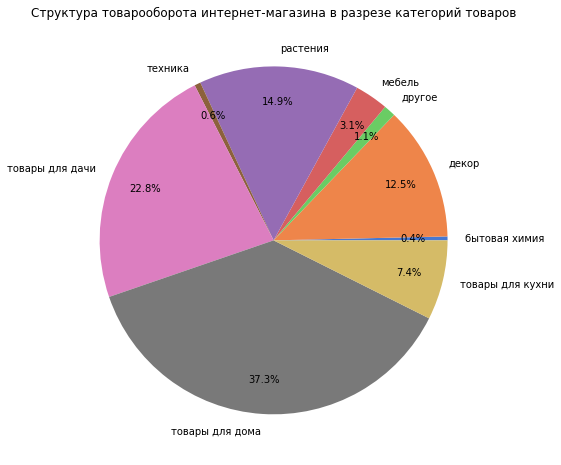

In [27]:
display(ecom.groupby(['category'])['revenue'].sum())
ecom.groupby(['category'])['revenue'].sum().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', pctdistance=0.8)
plt.title('Структура товарооборота интернет-магазина в разрезе категорий товаров')
plt.ylabel(' ')
# сохраним график в файл для будущей презентации
plt.savefig('plot_category.png');

Из диаграммы видно, выручка интернет-магазина сформирована главным образом в силу продажи следующих категорий товаров, представленных в ассортименте:
- товары для дома (37.3% или 1 294 166.0 рублей),
- товары для дачи (22.8% или 789 783.0 рублей),
- растения (14.9% или 516 464.0 рублей),
- декор (12.5% или 432 025.0 рублей),
- товары для кухни (7.4% или 256 482.0 рублей).

Столбец 'split' был введен только в качестве помощи для категоризации - в дальнейшем исследовании он не понадобится, удалим его:

In [28]:
ecom = ecom[['date', 'customer_id', 'order_id', 'product', 'quantity', 'price', 'revenue', 'category']]
ecom.sample(5)

,date,customer_id,order_id,product,quantity,price,revenue,category
3748,2019-05-14 11:00:00,a3394ff2-4cd2-4332-9f6c-2668ac608fbc,14769,томата (помидор) танцы со смурфиками № 111 сорт индетерминантный раннеспелый черный,1,38.0,38.0,растения
1719,2019-02-06 12:00:00,62952c5b-e5ef-4009-a2f9-1ebff401c514,14532,пеларгония зональная махровая лососевая,1,150.0,150.0,растения
853,2018-11-18 09:00:00,c6eec77f-eac3-4878-b336-cfbf0a38b1be,69037,"таз пластмассовый со стиральной доской (иж), 1404021",1,397.0,397.0,товары для дачи
4040,2019-05-27 11:00:00,8594b1c1-9f1c-4c2d-9658-1b8c80e76cff,71522,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, красная, простая",1,157.0,157.0,растения
6051,2019-08-05 11:00:00,7adbb583-cfcb-430d-9f88-808f8ed64aa6,72211,сумка-тележка 3-х колесная gimi tris floral синяя,1,2699.0,2699.0,товары для дачи


Далее нам предстоит распределить товары по двум группам: основные и дополнительные. Таким образом, при покупке основного товара мы сможем предлагать покупателю приобрести дополнительные товары. Будем исходить из допущения: основной товар имеет более высокую цену и приобретается в одном-двух экземплярах, дополнительный же - дешёвый и приобретается в больших количествах.  
Посмотрим, как распределяются товары по цене. Сгруппируем их по названию продукта, рассчитаем для каждого продукта медианную цену и построим гистограмму:

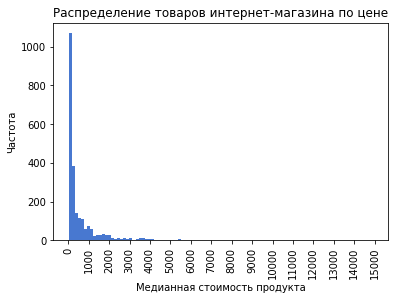

In [29]:
ecom.groupby(['product'])['price'].median().plot(kind='hist', bins = 100)
plt.xticks(np.arange(0, 16000, step=1000), rotation = 90)
plt.title('Распределение товаров интернет-магазина по цене')
plt.xlabel('Медианная стоимость продукта')
plt.ylabel('Частота')
# сохраним график в файл для будущей презентации
plt.savefig('plot_price_hist.png');

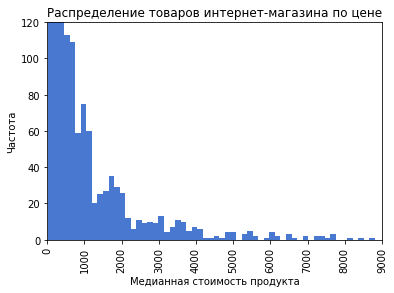

In [30]:
ecom.groupby(['product'])['price'].median().plot(kind='hist', bins = 100)
plt.xticks(np.arange(0, 10000, step=1000), rotation = 90)
plt.title('Распределение товаров интернет-магазина по цене')
plt.xlabel('Медианная стоимость продукта')
plt.ylabel('Частота')
plt.ylim(0, 120)
plt.xlim(0, 9000)
# сохраним график в файл для будущей презентации
plt.savefig('plot_price_hist_lim.png');

Можно заметить большой скачек в уровне цен между дешёвым и более дорогим товаром. Вспомим описательные статистики, которые смотрели ранее: 25% товаров имеют цену до 90 рублей. Эту цифру и примем в качестве критерия для разбиения на группы.  
Сначала сформируем список товаров, медианная цена которых находится в пределах 90 рублей. Далее напишем функцию, которая пройдется по всем строкам таблицы, сравнит название продукта с нашим списком и присвоит группу.

In [31]:
main_prod = ecom.groupby(['product']).agg(
    {'price':'median'}).reset_index().sort_values(by = 'price', ascending = False)
main_prod = main_prod[main_prod['price'] <= 90]
main_prod_list = list(main_prod['product'])

def main_product(prod):
    """
    Создадим функцию, которая будет проходиться по столбцу 'product' и сравнивать азвания со списком дополнительных товаров.
    При обнаружении совпадений функция будет присваивать 'False'. Таким образом мы получим признак принадлежности товара
    к основному ассортименту
    """ 
    if prod in main_prod_list:
        return False
    else:
        return True
    
# примеим функцию, создадим столбец с категориями товаров
ecom['main_product'] = ecom['product'].apply(main_product)
ecom.sample(10)

,date,customer_id,order_id,product,quantity,price,revenue,category,main_product
2191,2019-03-05 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70606,пеларгония розебудная red pandora укорененный черенок,1,134.0,134.0,растения,True
3364,2019-05-02 16:00:00,760aa067-90c3-4794-b7a9-a8831197388b,14715,пеларгония зональная диам. 12 см сиреневый полумахровый,1,150.0,150.0,растения,True
2466,2019-03-25 15:00:00,c64f3a03-5fa8-4c41-96ad-ae1ecfa486e0,70874,гладильная доска attribute teflonix 130х46 см abt142,1,4049.0,4049.0,товары для дома,True
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0,5800.0,другое,False
5697,2019-07-05 14:00:00,4a3e8c01-1d47-4867-8a7f-14195a8dbb3d,14893,капуста цветная мовир 74 в кассете 4 штуки скороспелая,1,60.0,60.0,растения,False
160,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"стяжка оконная с болтом ст-55 цинк, 1108354",64,19.0,1216.0,другое,False
1247,2018-12-18 06:00:00,3f25cb2b-1d98-442e-b688-b56eab16f592,69396,банка стеклянная с крышкой attribute fleur 650 мл abf135w,5,149.0,745.0,товары для кухни,True
3852,2019-05-16 22:00:00,ca274b0b-9724-4be9-b834-3f6749fc683f,14784,"рассада зелени для кухни базилик шалун, кассета по 6шт",1,169.0,169.0,растения,True
780,2018-11-12 10:00:00,f5da9e3b-3bea-4639-ada9-e6cc69ef4f83,68961,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, белая, махровая",1,149.0,149.0,растения,True
3963,2019-05-21 02:00:00,4bd9c1e8-b2cc-4ec5-97eb-28d8f3c22d8d,71480,мята перечная шоколадная chocolate d-7 см h-10 см укорененный черенок,1,74.0,74.0,растения,False


main_product
дополнительные     308559.0
основные          3158408.0
Name: revenue, dtype: float64

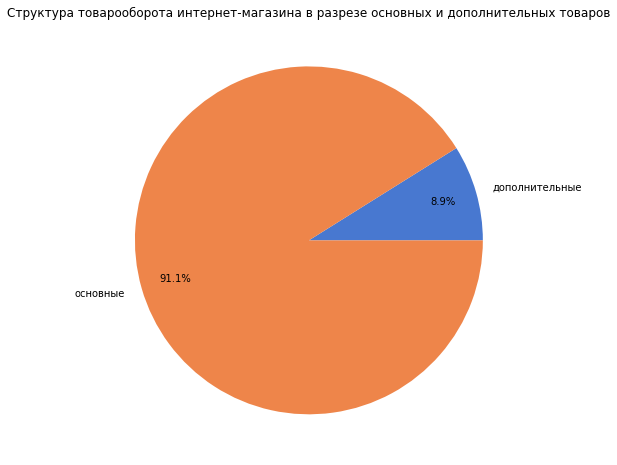

In [32]:
ecom.loc[ecom['main_product'] == True, 'main_product'] = 'основные'
ecom.loc[ecom['main_product'] == False, 'main_product'] = 'дополнительные'
display(ecom.groupby(['main_product'])['revenue'].sum())
ecom.groupby(['main_product'])['revenue'].sum().plot(
    kind='pie', figsize=(15, 8), autopct='%1.1f%%', pctdistance=0.8)
plt.title('Структура товарооборота интернет-магазина в разрезе основных и дополнительных товаров')
plt.ylabel(' ')
# сохраним график в файл для будущей презентации
plt.savefig('plot_main_product.png');

От продажи основных товаров в исследуемый приод получено 91.1% выручки, что составляет 3 158 408.0 рублей. Дополнительные же товары принесли 308 559.0 рублей (или 8.9% от всей выручки интернет-магазина).

Найдем самые популярные продукты среди основных и дополнительных товаров. Таким образом, мы определим наиболее востребованные позиции и сможем предоставить маркетингу перечень товаров для контроля закупок и продвижения.  
Так, например, данные продукты можно пометить на сайте как "Хит продаж" для привлечения внимания покупателей.  
Начнем с категории основных товаров:

In [33]:
ecom.loc[ecom['main_product'] == 'основные', 'main_product'] = True
ecom.loc[ecom['main_product'] == 'дополнительные', 'main_product'] = False
top_main_product = ecom[ecom['main_product'] == True].groupby(['product']).agg(
    {'quantity':'sum'}).reset_index().sort_values(by = 'quantity', ascending = False).head(20)
top_main_product_list = list(top_main_product['product'])
ecom.query('product in @top_main_product_list').groupby(['product', 'category', 'main_product']).agg(
    {'quantity':'sum', 'price':'median', 'revenue':'sum'}).reset_index().sort_values(
    by = 'revenue', ascending = False)

,product,category,main_product,quantity,price,revenue
17,сумка-тележка 2-х колесная gimi argo синяя,товары для дачи,True,47,1087.0,50405.0
3,вешалки мягкие для деликатных вещей 3 шт шоколад,товары для дома,True,335,156.0,49596.0
18,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,товары для дачи,True,59,637.0,33992.0
6,набор ножей attribute chef 5 предметов akf522,товары для кухни,True,64,457.0,29248.0
0,"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",товары для дома,True,37,540.0,20010.0
4,коврик придверный attribute nature кокосовый 60x40 см amc015,товары для дома,True,54,345.0,16888.0
15,салфетка protec textil polyline 30х43 см аметист белая 6230,декор,True,80,209.0,15700.0
16,спатифиллум шопен d-12 см,растения,True,46,256.0,11512.0
14,пеларгония розебудная red pandora укорененный черенок,растения,True,83,134.0,11191.0
8,пеларгония зональная диам. 12 см сиреневый полумахровый,растения,True,63,178.5,10780.0


Таким образом, мы выявили топ-20 основных товаров. Проделаем тоже самое с группой дополнительных:

In [34]:
top_additional_product = ecom[ecom['main_product'] == False].groupby(['product']).agg(
    {'quantity':'sum'}).reset_index().sort_values(by = 'quantity', ascending = False).head(20)
top_additional_product_list = list(top_additional_product['product'])
ecom.query('product in @top_additional_product_list').groupby(['product', 'category', 'main_product']).agg(
    {'quantity':'sum', 'price':'median', 'revenue':'sum'}).reset_index().sort_values(
    by = 'revenue', ascending = False)

,product,category,main_product,quantity,price,revenue
5,муляж яблоко 9 см красное,декор,False,618,59.0,32702.0
6,муляж яблоко зеленый 9 см полиуретан,декор,False,308,59.0,17572.0
18,"щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096",товары для дома,False,105,64.0,6810.0
7,"однолетнее растение петуния махровая в кассете 4 шт, россия",растения,False,80,82.0,6576.0
3,муляж банан желтый 21 см полиуретан,декор,False,109,59.0,5831.0
11,"ручка-скоба рс-100 белая *трибатрон*, 1108035",другое,False,200,29.0,5800.0
10,"пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014",другое,False,150,38.0,5700.0
19,"ёрш унитазный с деревянной ручкой , ваир 1712012",товары для дома,False,103,56.0,5633.0
4,муляж лимон желтый 9 см полиуретан,декор,False,92,59.0,4998.0
15,"шпингалет 80 мм белый с пружиной, 1102188",другое,False,100,44.0,4400.0


Муляжи яблок пользуются огромным спросом и по уровню выручки даже могут соперничать с некоторыми основными товарами. При разработке рекомендаций покупателю можно проработать наиболее популярные комбинации товаров "основной+дополнительный". Однако, это тема отдельного исследования и можно иметь её в виду на будущее.

Таким образом, на этапе исследовательского анализа мы выявили и устранили аномалии в данных, изучили средние цены и установили наиболее типичное количество товаров в заказе. Произвели категоризацию ассортимента интернет-магазина - выделили 9 главных направлений продаж. Установили категории товаров, дающие наибольший удельный вес в товарообороте. Кроме того, разложили ассортимент товаров на две группы: основные и дополнительные. В каждой из этих групп выявили топ-20 товаров, которые пользуются спросом у покупателей. Данные перечни наиболее востребованных позиций мы можем предоставить маркетингу для контроля закупок и продвижения. Так, например, данные продукты можно пометить на сайте как "Хит продаж" для привлечения внимания покупателей.  

---

<a id='anchor_4'></a>
## Динамика и сезонность продаж

Приступим к изучению динамики продаж. Построим график изменения выручки интернет магазина в исследуемом периоде. Однако, прежде добавим в таблицу столбец, в котором оставим только месяц:

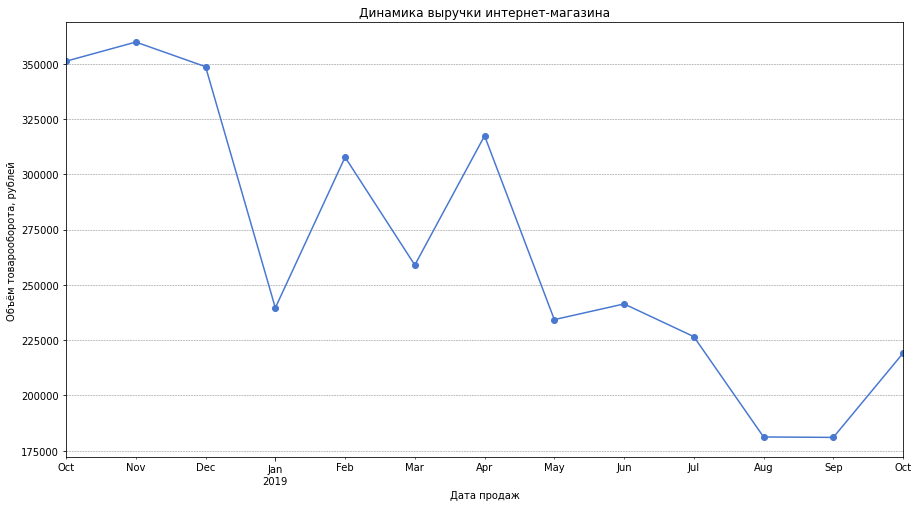

In [35]:
ecom['month'] = ecom['date'].values.astype('datetime64[M]')

ecom.groupby(['month'])['revenue'].sum().plot(figsize=(15,8), style='o-')
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title('Динамика выручки интернет-магазина')
plt.xlabel('Дата продаж')
plt.ylabel('Объём товарооборота, рублей')
# сохраним график в файл для будущей презентации
plt.savefig('plot_revenue_dynamics.png');

Итак, мы видим, что максимальный объём выручки в исследуемом периоде был достигнут в ноябре 2018 года и имел постепенную тенденцию к снижению. Очень большое падение продаж наблюдалось в августе и сентябре 2019 года. Интересно посмотреть, как менялась выручка в разрезе категорий товаров:

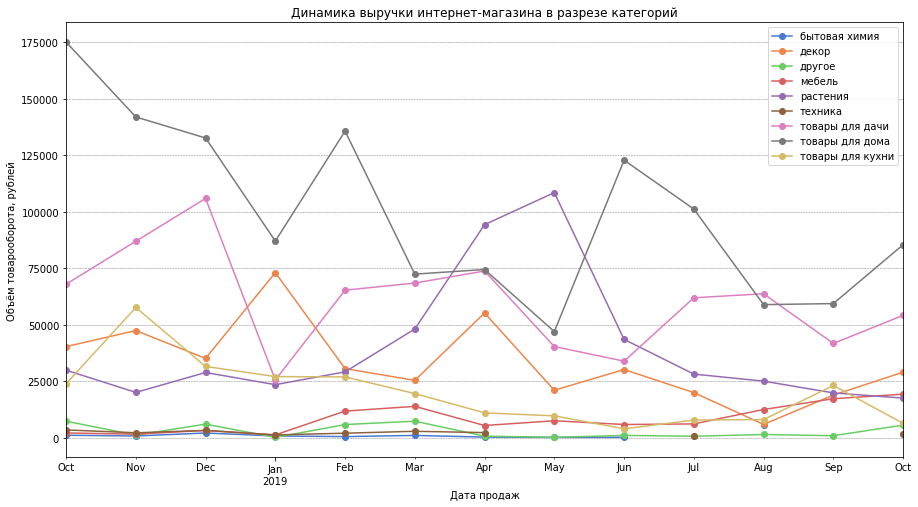

In [36]:
ecom.groupby(['category', 'month'])['revenue'].sum().unstack('category').plot(figsize=(15,8), style='o-')
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Динамика выручки интернет-магазина в разрезе категорий')
plt.xlabel('Дата продаж')
plt.ylabel('Объём товарооборота, рублей')
# сохраним график в файл для будущей презентации
plt.savefig('plot_revenue_category_dynamics.png');

На графике можно заметить, что 4 категории больше других подвержены сезонности:
- товары для дома (в марте, апреле, мае, августе и сентябре продажи упали),
- растения (рост продаж приходится на апрель и май),
- товары для дачи (выручка падает в январе и июне),
- декор (увеличение продаж в январе и апреле).

Добавим в таблицу столбец с маркером сезона продаж:

In [37]:
def season(sale_date):
    """
    Создадим функцию, которая будет проходиться по столбцу 'month' и присваивать маркер сезона:
    - зима,
    - лето,
    - осень,
    - весна.
    """ 
    if sale_date == datetime(2018, 10, 1).date() or sale_date == datetime(
        2018, 11, 1).date() or sale_date == datetime(2019, 9, 1).date() or sale_date == datetime(
        2019, 10, 1).date():
        return 'осень'
    if sale_date == datetime(2018, 12, 1).date() or sale_date == datetime(
        2019, 1, 1).date() or sale_date == datetime(2019, 2, 1).date():
        return 'зима'
    if sale_date == datetime(2019, 3, 1).date() or sale_date == datetime(
        2019, 4, 1).date() or sale_date == datetime(2019, 5, 1).date():
        return 'весна'
    else:
        return 'лето'
    
# примеим функцию, создадим столбец с категориями товаров
ecom['season'] = ecom['month'].apply(season)
ecom.sample(10)

,date,customer_id,order_id,product,quantity,price,revenue,category,main_product,month,season
28,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,"муляж гранат 9см, красный, fancy fair, sl90, красный",1,59.0,59.0,декор,False,2018-10-01,осень
2618,2019-04-02 12:00:00,749cef81-0af4-4620-b880-6a728df5dfe8,70976,гвоздика стандартная новия 70 см колумбия плантация turflor s.a.s 25 штук в упаковке,25,37.0,925.0,растения,False,2019-04-01,весна
5648,2019-07-04 09:00:00,68949888-09b4-4218-b1c8-8e4d70a69e3a,71865,цветок искусственный василек 3 цветка 55 см пластик,15,40.0,600.0,декор,False,2019-07-01,лето
602,2018-11-03 09:00:00,8e48682a-8ba6-4ee9-9a59-a9d07d00ffa4,68837,гладильная доска ника sophy корица hsk 123х46 см,1,2249.0,2249.0,товары для дома,True,2018-11-01,осень
2817,2019-04-13 12:00:00,42df590c-dd51-459c-b1ec-4ea8539aaccf,71128,"щетка хозяйственная dressetta для одежды с пластиковой ручкой бело-красная, leifheit, 41000",1,1462.0,1462.0,товары для дома,True,2019-04-01,весна
138,2018-10-08 13:00:00,bc59104e-73fb-4057-a65d-2325dc4b69dd,68569,"ёрш для бутылки из натурального волокна и металла 23 см кремовый, burstenmann, 0473/0003",10,142.0,1420.0,товары для кухни,True,2018-10-01,осень
3122,2019-04-24 21:00:00,2a0acc09-e343-4f92-b5c0-f598ef2b07d4,14688,томата (помидор) ильди №35 сорт детерминантный раннеспелый желтый,3,38.0,114.0,растения,False,2019-04-01,весна
3856,2019-05-16 22:00:00,ca274b0b-9724-4be9-b834-3f6749fc683f,14784,рассада зелени для кухни лаванда эдельвейс диам. 9 см,1,120.0,120.0,растения,True,2019-05-01,весна
186,2018-10-11 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68604,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, малиновая с красным, полумахровая",1,149.0,149.0,растения,True,2018-10-01,осень
6713,2019-10-29 14:00:00,ea4f913c-20d3-44d2-a3dd-c7c58014243f,73129,чайник заварочный 750 мл webber be-5567 с металлическим фильтром,1,344.0,344.0,товары для кухни,True,2019-10-01,осень


Построим столбчатую диаграмму продаж интернет-магазина по сезонам в разрезе категорий товара:

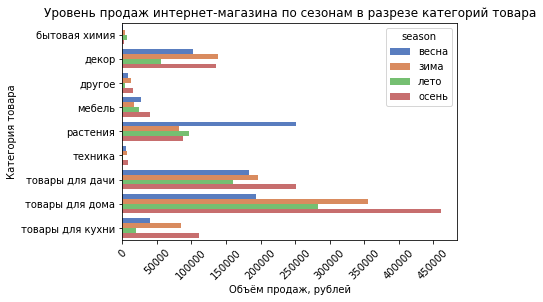

In [38]:
season_sales = ecom.groupby(by=['category','season'], as_index=False).agg({'revenue':'sum'})
sns.barplot(x='revenue', y='category', hue='season', data=season_sales)
plt.xticks(np.arange(0, 500000, step=50000), rotation = 45)
plt.title('Уровень продаж интернет-магазина по сезонам в разрезе категорий товара')
plt.xlabel('Объём продаж, рублей')
plt.ylabel('Категория товара')
# сохраним график в файл для будущей презентации
plt.savefig('plot_category_season.png');

Можно отметить, что продажа растений сильно возрастает зимой. Наблюдается большой прирост продаж товаров для дома осенью и зимой. Наименее прибыльные сезоны по многим категориям - лето и весна. Однако выручка от продаж товаров для дачи и для дома стабильно неплохая круглый год.

Проверим, влияет ли сезон на размер среднего чека:

In [39]:
mean_rev = ecom.groupby(by=['order_id'], as_index=False).agg({'revenue':'sum'})
mean_check = mean_rev['revenue'].mean()
print('Среднегодовой размер чека - ', round(mean_check, 2), ' рублей')

print('')
print('Средний чек в разбивке по сезонам')
check = ecom.groupby(by=['order_id','season'], as_index=False).agg({'revenue':'sum'})
season_check = check.groupby(by=['season'], as_index=False).agg({'revenue':'mean'})
season_check = season_check.rename(columns = {'revenue':'mean_check'})
season_check.style.format({'mean_check':'{:.2f}'})

Среднегодовой размер чека -  1245.77  рублей

Средний чек в разбивке по сезонам


,season,mean_check
0,весна,1166.42
1,зима,1219.01
2,лето,1211.27
3,осень,1350.05


Можно заметить, что размер среднего чека летом и зимой практически одинаковый. Весной его размер немного ниже среднегодового, а осенью - выше. Однако, стоит проверить, является ли эта разница статистически значимой. Стоит сказать, генеральная совокупнось может быть распределена как угодно: датасет из средних значений выборок всё равно будет нормально распределён вокруг среднего всей совокупности. Таким образом, можем переходить к проверке ряда гипотез о равенстве среднесезонных чеков.

Cформулируем следующие гипотезы для проверки:  
**H_0**: средние чеки весной и зимой равны,  
**H_1**: средние чеки весной и зимой отличаются.

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [40]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(check[check['season'] == 'весна']['revenue'], 
                       check[check['season'] == 'зима']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6413599800064876
Не получилось отвергнуть нулевую гипотезу


Таким образом, получаем, что разница между средними чеками весной и зимой не является статистически значимой. Проверим аналогичную гипотезу для следующей пары сезонов.

Cформулируем гипотезы для проверки:  
**H_0**: средние чеки весной и летом равны,  
**H_1**: средние чеки весной и летом отличаются.

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [41]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(check[check['season'] == 'весна']['revenue'], 
                       check[check['season'] == 'лето']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.7124923265168623
Не получилось отвергнуть нулевую гипотезу


Таким образом, получаем, что разница между средними чеками весной и летом не является статистически значимой. Проверим аналогичную гипотезу для следующей пары сезонов.

Cформулируем гипотезы для проверки:  
**H_0**: средние чеки весной и осенью равны,  
**H_1**: средние чеки весной и осенью отличаются.

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [42]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(check[check['season'] == 'весна']['revenue'], 
                       check[check['season'] == 'осень']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.06479711865758893
Не получилось отвергнуть нулевую гипотезу


Таким образом, получаем, что разница между средними чеками весной и осенью не является статистически значимой. Проверим аналогичную гипотезу для следующей пары сезонов.

Cформулируем гипотезы для проверки:  
**H_0**: средние чеки зимой и летом равны,  
**H_1**: средние чеки зимой и летом отличаются.

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [43]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(check[check['season'] == 'зима']['revenue'], 
                       check[check['season'] == 'лето']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9575000070433555
Не получилось отвергнуть нулевую гипотезу


Таким образом, получаем, что разница между средними чеками зимой и летом не является статистически значимой. Проверим аналогичную гипотезу для следующей пары сезонов.

Cформулируем гипотезы для проверки:  
**H_0**: средние чеки зимой и осенью равны,  
**H_1**: средние чеки зимой и осенью отличаются.

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [44]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(check[check['season'] == 'зима']['revenue'], 
                       check[check['season'] == 'осень']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.26733233186299793
Не получилось отвергнуть нулевую гипотезу


Таким образом, получаем, что разница между средними чеками зимой и осенью не является статистически значимой. Проверим аналогичную гипотезу для следующей пары сезонов.

Cформулируем гипотезы для проверки:  
**H_0**: средние чеки летом и осенью равны,  
**H_1**: средние чеки летом и осенью отличаются.

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [45]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(check[check['season'] == 'лето']['revenue'], 
                       check[check['season'] == 'осень']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2855317380625365
Не получилось отвергнуть нулевую гипотезу


Таким образом, получаем, что разница между средними чеками летом и осенью не является статистически значимой. Можем заключить, что нет значимого влияния сезона на размер среднего чека. Однако, следует отметить, что для изучения фактора сезонности неплохо было бы сравнить данные за несколько лет. Кроме того, на объём выручки и размер среднего чека могут влиять другие факторы. Например, запуск дополнительной рекламы, промо-акции, погодные условия многое другое. В нашем случае можно сделать вывод, что продажа сезонных товаров компенсирует друг друга: продажа растений увеличивает выручку весной, а товаров для дома и дачи - осенью.

В силу того, что мы не обнаружили значимого влияния сезона на размер среднего чека, проверим отличается ли количество проданного товара в разрезе категорий в зависимости от сезона:

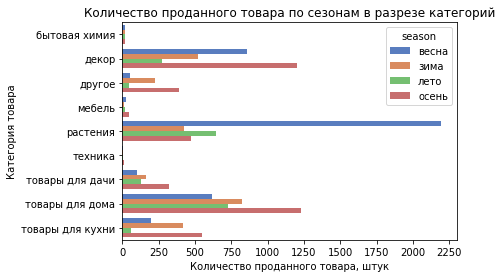

In [46]:
season_sales = ecom.groupby(by=['category','season'], as_index=False).agg({'quantity':'sum'})
sns.barplot(x='quantity', y='category', hue='season', data=season_sales)
plt.xticks(np.arange(0, 2500, step=250))
plt.title('Количество проданного товара по сезонам в разрезе категорий')
plt.xlabel('Количество проданного товара, штук')
plt.ylabel('Категория товара')
# сохраним график в файл для будущей презентации
plt.savefig('plot_category_season_quantity.png');

Мы видим, что растения очень хорошо продаются весной, а товары для дома и предметы декора - осенью. Товары для кухни плохо продаются летом. Данную инфрмацию можно учитывать при формировании закупок и планировании объёмов продаж.

Далее изучим динамику основных и дополнительных товаров в исследуемом периоде:

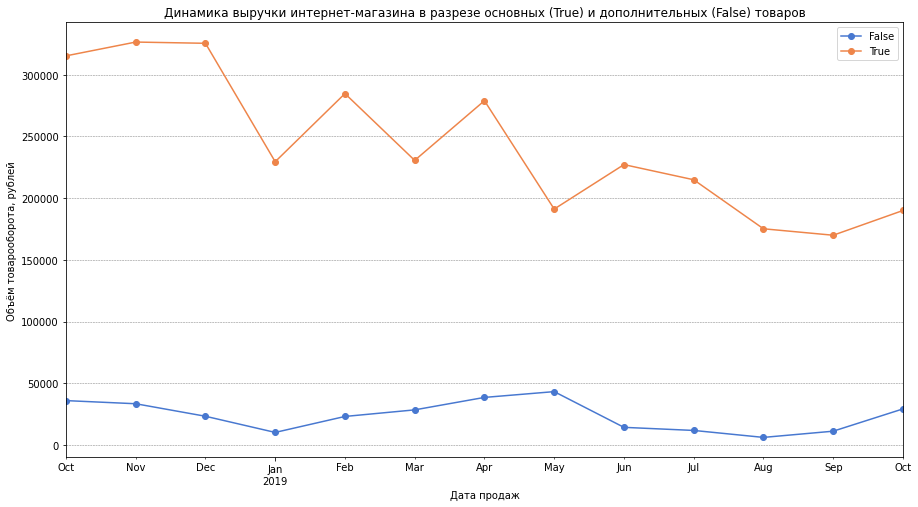

In [47]:
ecom.groupby(['main_product', 'month'])['revenue'].sum().unstack('main_product').plot(figsize=(15,8), style='o-')
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Динамика выручки интернет-магазина в разрезе основных (True) и дополнительных (False) товаров')
plt.xlabel('Дата продаж')
plt.ylabel('Объём товарооборота, рублей')
# сохраним график в файл для будущей презентации
plt.savefig('plot_revenue_main_add_dynamics.png');

Можно заметить, что выручка от продажи дополнительных товаров более стабильна, но она и невысокая в сравнении с сегментом основных товаров. По основным товарам в исследуемом периоде можно проследить общее падение выручки: осенью 2018 года она значително выше, чем осенью 2019 года. Чтобы разобраться в причинах данного явления, нам не хватает инфорации. Виной тому могло послужить что угодно: смена поставщика, неудачная реклама, обновление интерфейса интернет-магазина, пандемия и многое другое.

Последнее, что нам остаётся проверить - влияние сезона на продажу основных и дополнительных товаров. Построим стлбчатую диаграмму:

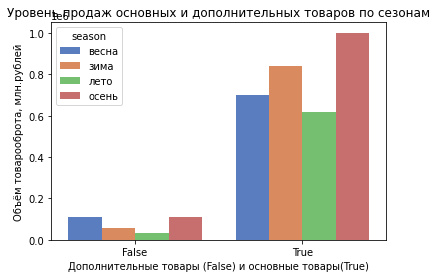

In [48]:
season_sales_main_add = ecom.groupby(by=['main_product', 'season'], as_index=False).agg({'revenue':'sum'})
sns.barplot(x='main_product', y='revenue', hue='season', data=season_sales_main_add)
plt.title('Уровень продаж основных и дополнительных товаров по сезонам')
plt.xlabel('Дополнительные товары (False) и основные товары(True)')
plt.ylabel('Объём товарооброта, млн.рублей')
# сохраним график в файл для будущей презентации
plt.savefig('plot_main_add_season.png');

Больше всего дополнительных товаров продаётся весной и осенью. Продажа основных товаров немного снижается летом и достигает своего максимума осенью.

Итак, мы изучили динамику продаж товаров в нашем интернет-магазине. Заметили, что в изучаемом периоде объём выручки имеет тенденцию к снижению. Установили, что ряд категорий товаров подвержены сезонности. Например, растения очень хорошо продаются весной, а товары для дома и предметы декора - осенью. Товары для кухни плохо продаются летом. Данную инфрмацию можно учитывать при формировании закупок и планировании объёмов продаж. В то же время размер среднего чека не имеет статистической разницы между сезонами.  
Выручка от продажи дополнительных товаров более стабильна, но она и невысокая в сравнении с сегментом основных товаров. По основным товарам в исследуемом периоде можно проследить общее падение выручки: осенью 2018 года она значително выше, чем осенью 2019 года. Чтобы разобраться в причинах данного явления, необходимо обратиться к дополнительной инфорации.

---

<a id='anchor_5'></a>
## Кластеризация заказов

Перед интернет-магазином поставлена задача - увеличить объём прибыли (для чего необходимо стимулировать рост продаж и минимизировать издержки). Издержки в рамках данного проекта мы не исследуем, поэтому будем изучать выручку. Нам необходимо понять, какие заказы покупателей (набор товаров) приносят большую выгоду. Чтобы ответить на данный вопрос, проведём сегментацию заказов при помощи кластеризации.  
Прежде, чем находить группы заказов похожих друг на друга, нам нужно оределиться с факторами кластеризации. Таким образом, мы имеем:
- количество товара в заказе,
- цена товара,
- выручка по заказу (не имеет смысл добавлять, так как будет мультиколлинеарным фактором к двум предыдущим),
- количество уникальных видов товара в заказе.

Сначала сформируем матриу признаков:

In [49]:
orders = ecom.groupby(by=['order_id'], as_index=False).agg({'price':'mean', 'quantity':'sum', 'product':'nunique'})
X = orders.drop('order_id', axis = 1) # сохраним в переменной матрицу объектов-признаков, удалив из датафрейма колонку 'order_id'
X.head()

,price,quantity,product
0,187.500000,2,2
1,228.000000,3,3
2,119.666667,3,3
3,150.000000,4,4
4,188.000000,2,2


Убедимся в отсутствии мультиколлинеарности между факторами. Построим тепловую карту с коэффициентами корреляции:

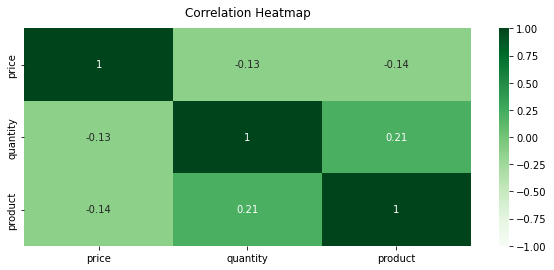

In [50]:
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap= 'Greens')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Все три фактора нам подходят, они не имеют тесной связи друг с другом.
Проведём кластеризацию объектов (заказов):
- стандартизируем данные,
- построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков,
- нарисуем дендрограмму.

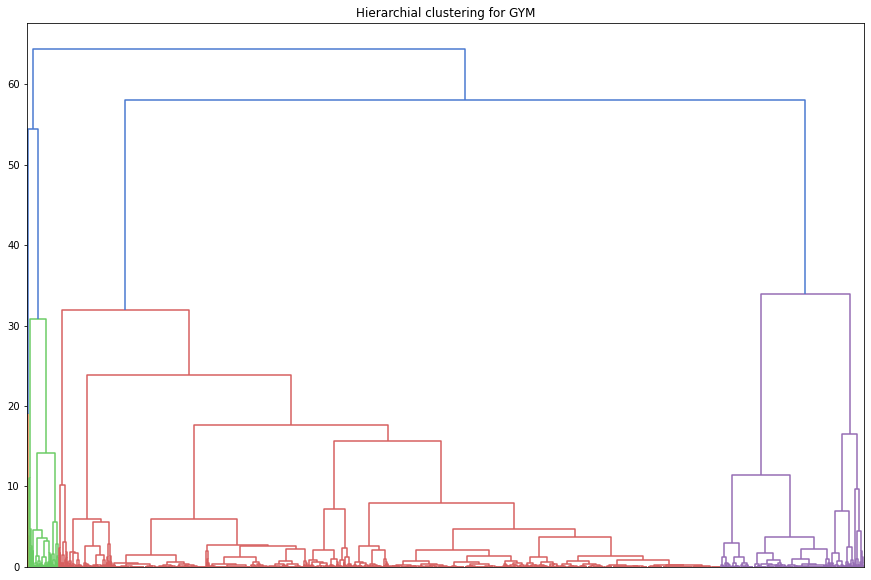

In [51]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

# строим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True) # уберем ярлыки, чтобы сократить время построения дендрограммы
plt.title('Hierarchial clustering for GYM')
# сохраним график в файл для будущей презентации
plt.savefig('plot_dendrogram.png')
plt.show();

На основании полученного графика можно выделить 3 кластера. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

Посмотрим на средние значения признаков для кластеров:

In [52]:
# задаём модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=3, random_state=12345)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
orders['cluster_km'] = labels

# выведем количество пользователей, попавших в каждый кластер
print('Количество заказов в каждом кластере:')
print(orders.groupby(['cluster_km']).count()['order_id'])

# выводим статистику по средним значениям наших признаков по кластеру
orders.groupby(['cluster_km']).mean().T

Количество заказов в каждом кластере:
cluster_km
0    2426
1     235
2     122
Name: order_id, dtype: int64


cluster_km,0,1,2
order_id,65729.106760,70757.761702,31395.221311
price,513.774915,3853.625532,113.439834
quantity,3.271228,1.051064,38.057377
product,1.322341,1.008511,11.237705


Таким образом, мы получили три типичных варианта заказа:
- 3-4 единицы товара, 1-2 вида товара со средней стоимостью около 500 рублей (самый многочисленный кластер),
- дорогостоящий товар в количестве одна штука (практически всегда эти заказы состоят только из одного основного товара),
- самый редкий вид заказа - дешёвые товары в большом количестве.

Чтобы сравнить кластеры между собой, присоединим информацию о кластерах к первоначальному неотфильтрованному датафрейму:

In [53]:
orders = orders[['order_id', 'cluster_km']]
ecom = ecom.merge(orders, how='left', on='order_id')
ecom.head()

,date,customer_id,order_id,product,quantity,price,revenue,category,main_product,month,season,cluster_km
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,растения,True,2018-10-01,осень,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,194.0,растения,True,2018-10-01,осень,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,растения,True,2018-10-01,осень,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,растения,True,2018-10-01,осень,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,растения,True,2018-10-01,осень,0


Рассчитаем по каждому кластеру объём выручки и средний размер чека в исследуемом периоде:

In [54]:
cluster = ecom.groupby(by=['cluster_km', 'order_id'], as_index=False).agg({'revenue':'sum'})
cluster = cluster.groupby(by=['cluster_km'], as_index=False).agg({'revenue':['sum', 'mean']})
cluster

cluster_km    revenue             
                    sum         mean
0          0  2126054.0   876.361913
1          1   955961.0  4067.919149
2          2   384952.0  3155.344262

Таким образом получаем, что основную долю выручки приносят заказы самого многочисленного кластера, а средний чек в этом кластере как раз самый маленький. При формирвании ассортимента или разработке рекомендаций покупателю следует поизучать заказы нулевого кластера. Например, можно поискать наиболее популярные комбинации товаров, а далее при заказе одного продукта предлагать покупателю другой товар из этих популярных комбинаций.  
Посмотрим, товары каких категорий сильнее всего представлены в заказах каждого кластера:

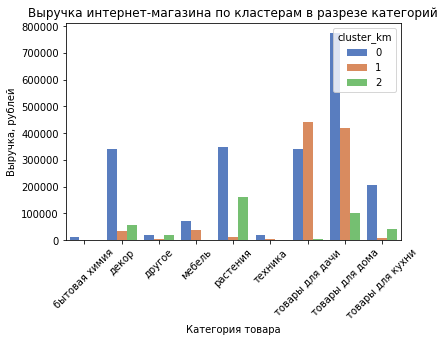

In [55]:
cluster_sales = ecom.groupby(by=['category','cluster_km'], as_index=False).agg({'revenue':'sum'})
sns.barplot(x='category', y='revenue', hue='cluster_km', data=cluster_sales)
plt.xticks(rotation = 45)
plt.title('Выручка интернет-магазина по кластерам в разрезе категорий')
plt.xlabel('Категория товара')
plt.ylabel('Выручка, рублей')
# сохраним график в файл для будущей презентации
plt.savefig('plot_category_cluster.png');

Получаем, что в заказы нулевого кластера чаще других попадают товары для дома, для дачи, растения и предметы декора. Первый кластер составляют преимущественно заказы, содержащие тоавры для дома и дачи. Во втором кластере чаще всего оказываются растения - что предсказуемо, данную категорию представляют семена и рассада (они имеют небольшую цену и продаются в больших количествах).  
Посмотрим, как распределяется выручка по кластерам в зависимости от времени года:

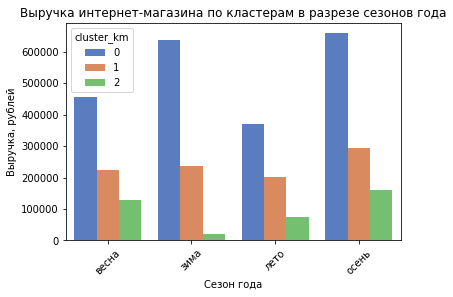

In [56]:
cluster_season = ecom.groupby(by=['season','cluster_km'], as_index=False).agg({'revenue':'sum'})
sns.barplot(x='season', y='revenue', hue='cluster_km', data=cluster_season)
plt.xticks(rotation = 45)
plt.title('Выручка интернет-магазина по кластерам в разрезе сезонов года')
plt.xlabel('Сезон года')
plt.ylabel('Выручка, рублей')
# сохраним график в файл для будущей презентации
plt.savefig('plot_season_cluster.png');

Можно заметить, что наиболее стабильны продажи в первом кластере - выручка на неплохом уровне держится круглый год. Нулевой кластер подвержен сезонности - зимой и осень выручка выше, чем весной и летом. Второй кластер лучше всего себя проявляет весной и осенью.  
Посмотрим, как структурируются заказы в кластерах в разрезе основных и дополнительных товаров. В данном случае выручка будет значительно выше по основным товарам, так как цена этих товаров выше, поэтому сравнение произведём по количеству проданного товара:

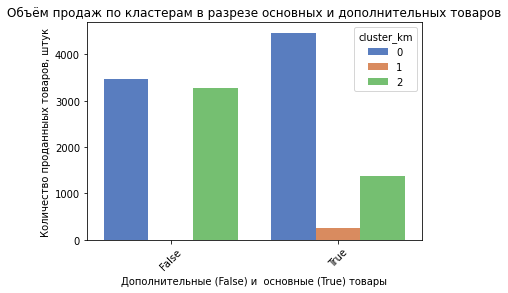

In [57]:
cluster_main_add = ecom.groupby(by=['main_product','cluster_km'], as_index=False).agg({'quantity':'sum'})
sns.barplot(x='main_product', y='quantity', hue='cluster_km', data=cluster_main_add)
plt.xticks(rotation = 45)
plt.title('Объём продаж по кластерам в разрезе основных и дополнительных товаров')
plt.xlabel('Дополнительные (False) и  основные (True) товары')
plt.ylabel('Количество проданныых товаров, штук')
# сохраним график в файл для будущей презентации
plt.savefig('plot_main_add_cluster.png');

Можем заметить, что в заказах первого кластера практически всегда отсутствуют дополнительные товары. Сделаем вывод, что приобретая дорогостоящий товар, покупатель особо не склонен дополнять заказ ещё каким-то мелкими недоогими товарами. В нулевом и втором кластерах хорошо продаются как основные, так и дополнительные товары.

Итак, мы закончили работу с кластеризацией заказов. Все заказы можно разбить на три группы:
- нулевой кластер: 3-4 единицы товара, 1-2 вида товара со средней стоимостью около 500 рублей (самый многочисленный кластер),
- первый кластер: дорогостоящий товар в количестве одна штука (практически всегда эти заказы состоят только из одного основного товара),
- второй кластер: самый редкий вид заказа - дешёвые товары в большом количестве.

Основную долю выручки приносят заказы самого многочисленного кластера, а средний чек в этом кластере как раз самый маленький. При формирвании ассортимента или разработке рекомендаций покупателю следует поизучать заказы нулевого кластера. Далее мы сравнили кластеры между собой в разрезе категорий товара, сезона продаж и вида товара - основной и дополнительный.  
В заказы нулевого кластера чаще других попадают товары для дома, для дачи, растения и предметы декора. Первый кластер составляют преимущественно заказы, содержащие тоавры для дома и дачи. Во втором кластере чаще всего оказываются растения - что предсказуемо, данную категорию представляют семена и рассада (они имеют небольшую цену и продаются в больших количествах).  
Наиболее стабильны продажи в первом кластере - выручка на неплохом уровне держится круглый год. Нулевой кластер подвержен сезонности - зимой и осень выручка выше, чем весной и летом. Второй кластер лучше всего себя проявляет весной и осенью.  
Дополнительные товары почти никогда не попадают в заказы первого кластера. Приобретая дорогой товар, покупатель редко дополняет заказ ещё дешёвым. В двух других кластерах хорошо продаются товары обеих групп.

---

<a id='anchor_6'></a>
## Общий вывод и рекомендации



На первом этапе исследования мы познакомились с данными, определили период исследования, проверили наличие пропусков и дубликатов - избавились от них.

На этапе исследовательского анализа мы выявили и устранили аномалии в данных, изучили средние цены и установили наиболее типичное количество товаров в заказе - в большинстве случаев покупатели заказывают один товар. Произвели категоризацию ассортимента интернет-магазина - выделили 9 главных направлений продаж. Установили категории товаров, дающие наибольший удельный вес в товарообороте. Кроме того, разложили ассортимент товаров на две группы: основные и дополнительные. В каждой из этих групп выявили топ-20 товаров, которые пользуются спросом у покупателей. Данные перечни наиболее востребованных позиций мы можем предоставить маркетингу для контроля закупок и продвижения. Так, например, данные продукты можно пометить на сайте как "Хит продаж" для привлечения внимания покупателей.

Далее мы изучили динамику продаж товаров в нашем интернет-магазине. Обнаружили, что в изучаемом периоде объём выручки имеет тенденцию к снижению. Установили, что некоторые категории товаров подвержены сезонности. Например, растения очень хорошо продаются весной, а товары для дома и предметы декора - осенью. Товары для кухни плохо продаются летом. Данную информацию можно учитывать при формировании закупок и планировании объёмов продаж. В то же время размер среднего чека не имеет статистической разницы между сезонами.
Выручка от продажи дополнительных товаров более стабильна, но она и невысокая в сравнении с сегментом основных товаров. По основным товарам в исследуемом периоде можно проследить общее падение выручки: осенью 2018 года она значително выше, чем осенью 2019 года. Чтобы разобраться в причинах данного явления, необходимо обратиться к дополнительной информации.

При помощи кластеризации мы разделили все заказы на три группы:
- нулевой кластер: 3-4 единицы товара, 1-2 вида товара со средней стоимостью около 500 рублей (самый многочисленный кластер),
- первый кластер: дорогостоящий товар в количестве одна штука (практически всегда эти заказы состоят только из одного основного товара),
- второй кластер: самый редкий вид заказа - дешёвые товары в большом количестве.

Далее мы рассчитали объём выручки и размер среднего чека по каждому кластеру. Основную долю выручки приносят заказы самого многочисленного кластера, а средний чек в этом кластере как раз самый маленький. При формирвании ассортимента или разработке рекомендаций покупателю следует поизучать заказы нулевого кластера.  
В процессе сравнения кластеров между собой мы выяснили, что в заказы нулевого кластера чаще других попадают товары для дома, для дачи, растения и предметы декора. Первый кластер составляют преимущественно заказы, содержащие тоавры для дома и дачи. Во втором кластере чаще всего оказываются растения - что предсказуемо, данную категорию представляют в большинстве своём семена и рассада (они имеют небольшую цену и продаются в больших количествах).
Изучили фактор сезонности в кластеах: наиболее стабильны продажи в первом кластере - выручка на неплохом уровне держится круглый год. Нулевой кластер подвержен сезонности - зимой и осень выручка выше, чем весной и летом. Второй кластер лучше всего себя проявляет весной и осенью.
Дополнительные товары почти никогда не попадают в заказы первого кластера. Приобретая дорогой товар, покупатель редко дополняет заказ ещё дешёвым. В двух других кластерах хорошо продаются товары обеих групп.
___
Таким образом, принимая во внимание проведённое исследование, можно сформулировать для интернет-магазина "Пока все ещё тут" **следующие рекомендации:**  
- в рамках оптимизации ассортимента следует применять каналы продвижения для продукции из топ-20 основых и дополнительных товаров (например, можно пометить их на сайте как "Хит продаж"). Наименее востребованные продукты можно исключить из ассортимента или снизить их закупки;  
- при планировании структуры ассортимента следует принимать во внимание фактор сезонности: растения лучше всего продаются весной, а товары для дома и предметы декора - осенью;  
- в исследуемом периоде выручка имела тенденцию к снижению, что произошло из-за падения продаж основных товаров. Необходимо разобраться в причинах (провести дополнительное исследование);  
- при разработке алгоритма блока "С этим покупают", где будет отражена информация о сопутствующих товарах, следует иметь в виду, что основной сегмент заказов имеет средний чек в пределах 800-900 рублей. Покупатели, приобретающие дорогостоящий товар практически никогда не дополняют заказ дешёвым.

Для формирования дашборда по текущему исследования подготовим и выгрузим файл.  
Дашборд будет содержать:
1. Диаграмму, отображающую сумму покупок по дням.
2. Гистограмму, отображающую распределение заказов по сумме. 
3. Фильтр по дате совершения покупки.

In [58]:
dash = ecom.groupby('order_id').agg({'revenue':'sum'})
dash = dash.merge(ecom[['date', 'order_id', 'month', 'season']], how='left', on='order_id')
dash.to_csv('dashboard.csv')
dash.head()

,order_id,revenue,date,month,season
0,12624,375.0,2019-06-02 20:00:00,2019-06-01,лето
1,12624,375.0,2019-06-02 20:00:00,2019-06-01,лето
2,13547,684.0,2018-11-16 16:00:00,2018-11-01,осень
3,13547,684.0,2018-11-16 16:00:00,2018-11-01,осень
4,13547,684.0,2018-11-16 16:00:00,2018-11-01,осень
